In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files


In [ ]:



uploaded = files.upload() #You should download the SGYC.xlsx file as a .csv and then upload it here

#Data Manipulation

In [ ]:
df = pd.read_csv("SGYC.csv") #Creating a dataframe using the name of the file pasted above


df.drop('#', axis=1,inplace=True) #Dropping the number column since we already have this by default
df.columns = ['Date-Time', 'Temp°C', 'lux'] #Renaming columns for easier legibility

temp_list = df['Temp°C'].tolist() #Converting the column to a list so that we can iterate over it


def group(temp_list,group_size):
  return [temp_list[i:i + group_size] for i in range(0, len(temp_list), group_size)] #Groups the list of temperatures into groups according to a set parameter (group_size)

"""
This (0, len(temp_list), group_size) represents what is being iterated over.
the loop is bound to the length of temp_list, but group_size represents the step size
"""



sorted = group(temp_list,60)


sorted = pd.DataFrame(sorted) #Rows are entries, Columns are groups



In [ ]:
df['Date-Time'] = pd.to_datetime(df['Date-Time'], format="%m/%d/%Y %H:%M:%S")

# Take every 60th timestamp (1 per hour)
hour_labels = df['Date-Time'][::60].dt.strftime("%m/%d/%Y %H:%M:%S").tolist()
hour_labels.pop()
print(len(hour_labels))
print(hour_labels[:5])   # preview

799
['06/10/2025 11:53:04', '06/10/2025 12:53:04', '06/10/2025 13:53:04', '06/10/2025 14:53:04', '06/10/2025 15:53:04']


In [ ]:
sorted.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,23.98,24.11,24.24,24.32,24.36,24.49,24.54,24.49,24.45,24.45,...,20.46,20.37,20.37,20.37,20.37,20.33,20.37,20.37,20.37,20.42
1,20.42,20.50,20.50,20.50,20.55,20.63,20.68,20.72,20.76,20.80,...,20.76,20.76,20.72,20.68,20.68,20.63,20.59,20.59,20.55,20.50
2,20.50,20.42,20.33,20.20,20.12,20.07,19.95,19.95,19.95,19.99,...,20.72,20.76,20.76,20.76,20.85,20.89,20.93,20.93,21.02,21.02
3,21.02,21.06,21.70,22.13,22.01,21.88,21.75,21.62,21.53,21.36,...,20.50,20.46,20.46,20.33,20.33,20.25,20.25,20.20,20.20,20.20
4,20.20,20.20,20.20,20.25,20.25,20.29,20.29,20.29,20.33,20.37,...,20.55,20.59,20.55,20.63,20.59,20.63,20.63,20.63,20.59,20.68


#Returns average hourly temp

In [ ]:
def average_temp(data_frame):
    averages = []
    for i in range(len(data_frame)):
        data_list = data_frame.iloc[i].tolist()
        average_temp = np.mean(data_list)
        if np.isfinite(average_temp): #Accounting for NaNs
          averages.append(float(average_temp))
    return averages

averages = average_temp(sorted)



average_temper = pd.DataFrame(averages)

average_temper.columns = ["Average temperature (celsius)"]

average_temper.head()

,Average temperature (celsius)
0,22.965333
1,20.518167
2,20.486000
3,20.802667
4,20.458667


In [ ]:

def set_depth_location(depth, location, data_frame):
  # Create lists with the same length as the DataFrame index
  locat = list([location] * len(data_frame))
  dep = list([depth] * len(data_frame))

  data_frame["Location"] = locat #adding new columns
  data_frame["Depth (ft)"] = dep
  return data_frame

averages = set_depth_location("8 ft", "SGYC", average_temper)


averages["Date"] = hour_labels






In [ ]:
averages.head()

,Average temperature (celsius),Location,Depth (ft),Date
0,22.965333,SGYC,8 ft,06/10/2025 11:53:04
1,20.518167,SGYC,8 ft,06/10/2025 12:53:04
2,20.486000,SGYC,8 ft,06/10/2025 13:53:04
3,20.802667,SGYC,8 ft,06/10/2025 14:53:04
4,20.458667,SGYC,8 ft,06/10/2025 15:53:04


In [ ]:
plt_graph = averages.drop(columns=["Depth (ft)", "Location"])

#Uploading second graph

In [ ]:
sec = files.upload()

Saving 4frame.csv to 4frame.csv


In [ ]:
sec = pd.read_csv('4frame.csv')

In [ ]:
sec.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
sec.head()

,Average temperature (celsius),Location,Depth (ft),Date
0,24.097333,SGYC,2 ft,06/10/2025 11:40:15
1,20.448333,SGYC,2 ft,06/10/2025 12:40:15
2,20.427333,SGYC,2 ft,06/10/2025 13:40:15
3,20.707333,SGYC,2 ft,06/10/2025 14:40:15
4,20.336500,SGYC,2 ft,06/10/2025 15:40:15


#Setting location for ds1 and 2

In [ ]:
first_location = plt_graph.iloc[1]["Location"]
second_location = sec.iloc[1]["Location"]

depth1 = plt_graph.iloc[1]["Depth (ft)"]

depth2 = sec.iloc[1]["Depth (ft)"]

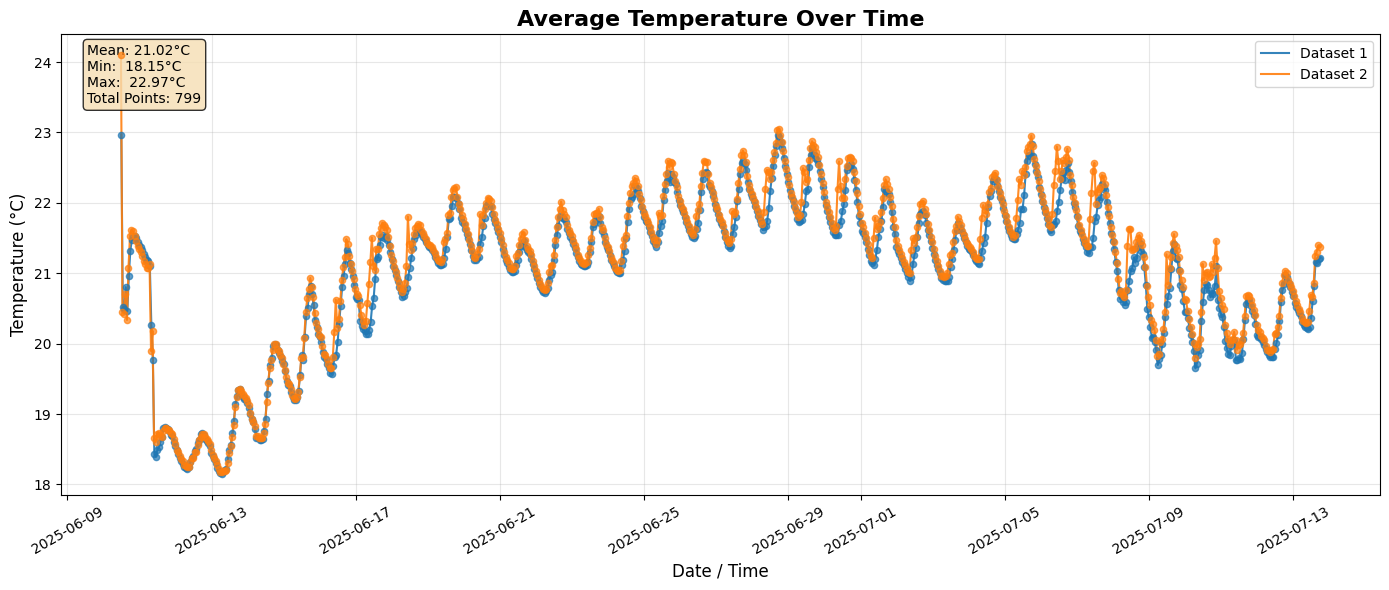

In [ ]:
def plot_hourly_temperature(df, df2, title="Average Temperature Over Time"):

    # Ensure Date is datetime
    df = df.copy()
    df2 = df2.copy()
    df["Date"] = pd.to_datetime(df["Date"])
    df2["Date"] = pd.to_datetime(df2["Date"])

    # Extract x/y for both datasets
    x1 = df["Date"]
    y1 = df["Average temperature (celsius)"]

    x2 = df2["Date"]
    y2 = df2["Average temperature (celsius)"]

    plt.figure(figsize=(14, 6))

    # Plot DF1
    plt.plot(x1, y1, linewidth=1.5, alpha=0.9, label=f"Location: {first_location} Depth: {depth1} ")
    plt.scatter(x1, y1, s=20, alpha=0.7, zorder=5)

    # Plot DF2
    plt.plot(x2, y2, linewidth=1.5, alpha=0.9, label=f"Location: {second_location} Depth: {depth2}")
    plt.scatter(x2, y2, s=20, alpha=0.7, zorder=5)

    # Labels + title
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel("Date / Time", fontsize=12)
    plt.ylabel("Temperature (°C)", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()

    # Rotate dates
    plt.xticks(rotation=30)

    # Stats box (for df1, but you can choose)
    stats_text = (
        f"Mean for ds1: {np.mean(y1):.2f}°C\n"
        f"Mean for ds2 {np.mean(y2):.2f}°C\n"
        f"Min for ds1:  {y1.min():.2f}°C\n"
        f"Max for ds1:  {y1.max():.2f}°C\n"
        f"Total Points: {len(df)}"
    )

    plt.text(
        0.02, 0.98, stats_text,
        transform=plt.gca().transAxes,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8)
    )

    plt.tight_layout()
    plt.show()

plot_hourly_temperature(plt_graph, sec, title="Average Temperature Over Time")


#Define Model

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

#Converting the date column to date time format
averages['Date'] = pd.to_datetime(averages['Date'])

# Extract date-time components for easier one hot encoding + pattern learning
averages['Hour'] = averages['Date'].dt.hour
averages['Minute'] = averages['Date'].dt.minute
averages['Second'] = averages['Date'].dt.second
averages['Day'] = averages['Date'].dt.day
averages['Month'] = averages['Date'].dt.month
averages['Year'] = averages['Date'].dt.year
#making it easier to process


# Define features and target
X = averages[['Location', 'Depth (ft)', 'Hour', 'Minute', 'Second', 'Day', 'Month', 'Year']]
y = averages['Average temperature (celsius)']

# One-hot encode only the categorical columns (non-numerical)
X = pd.get_dummies(X, columns=['Location', 'Depth (ft)'], drop_first=True) #These are not considered in model training (The columns are deleted by drop_first)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

1
model = RandomForestRegressor(n_estimators=28, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R_squared:", r2_score(y_test, y_pred))


MAE: 0.08059791666666684
R_squared: 0.990253567276692


#Making predictions using the model

In [ ]:
Hour = int(input("Enter an hour value (1-24): "))
Minute = int(input("Enter a minute value (0-59): "))
Second = int(input("Enter a second value (0-59) Prepend a 0 for 1-digit values e.g. 07: "))
Day = int(input("Enter a day: "))
Month = int(input("Enter a month: "))
Year = int(input("Enter a year (e.g. 2025): "))

if Hour >24:
  raise ValueError




future_row = pd.DataFrame([{
    'Hour': Hour,
    'Minute': Minute,
    'Second': Second,
    'Day': Day,
    'Month': Month,
    'Year': Year
}])

# Predict
prediction = float(model.predict(future_row))

# Display timestamp
timestamp_str = f"{Month}/{Day}/{Year} at {Hour:02d}:{Minute:02d}:{Second:02d}"
print(f"The predicted temperature for {timestamp_str} is {prediction:.2f}°C")



Enter an hour value (1-24): 23
Enter a minute value (0-59): 32
Enter a second value (0-59) Prepend a 0 for 1-digit values e.g. 07: 07
Enter a day: 2
Enter a month: 12
Enter a year (e.g. 2025): 2028
The predicted temperature for 12/2/2028 at 23:32:07 is 21.38°C


/tmp/ipython-input-3789411248.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction = float(model.predict(future_row))


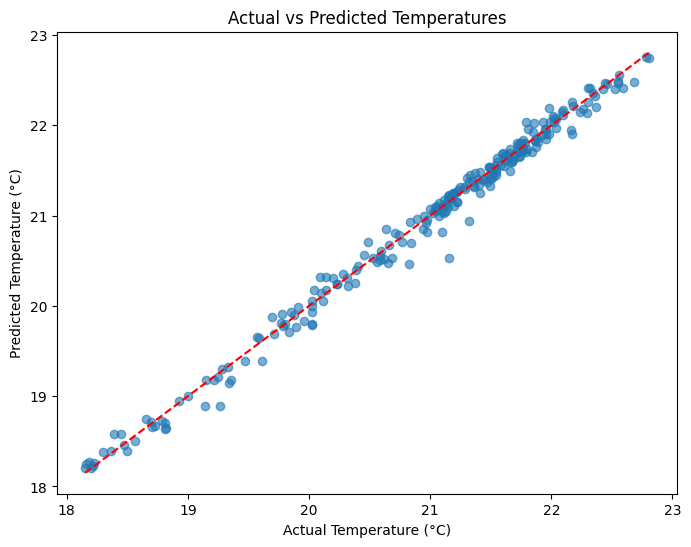

"\nShowing the model's predictions. The red line is the actual temp, and the blue dots are what the model predicted.\n\nIt can be shown that the model's predictions explain most of the data, with a few small outliers.\n\n\n"

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Actual vs Predicted Temperatures")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.show()




"""
Showing the model's predictions. The red line is the actual temp, and the blue dots are what the model predicted.

It can be shown that the model's predictions explain most of the data, with a few small outliers.


"""


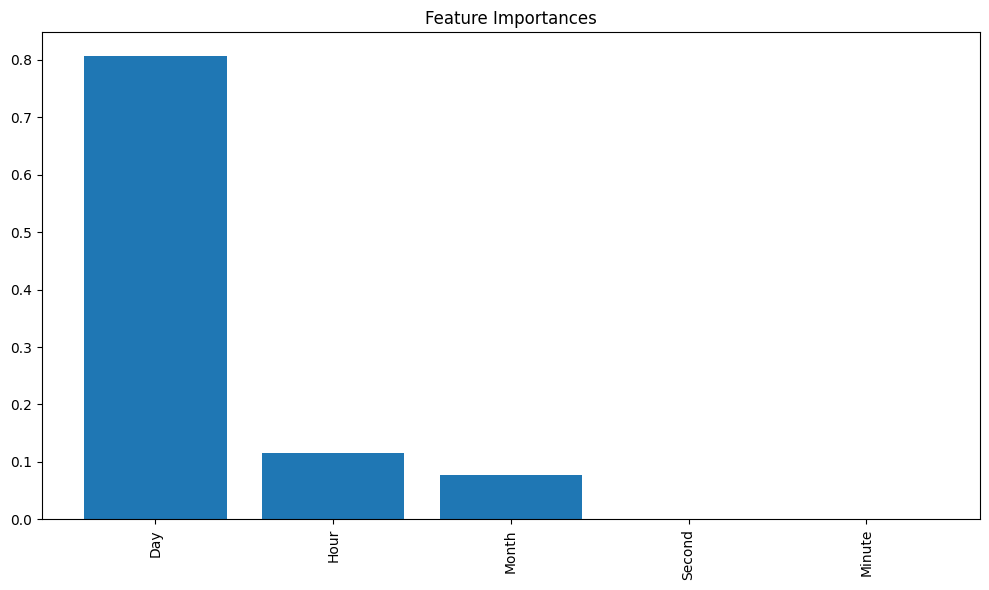

In [ ]:
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()


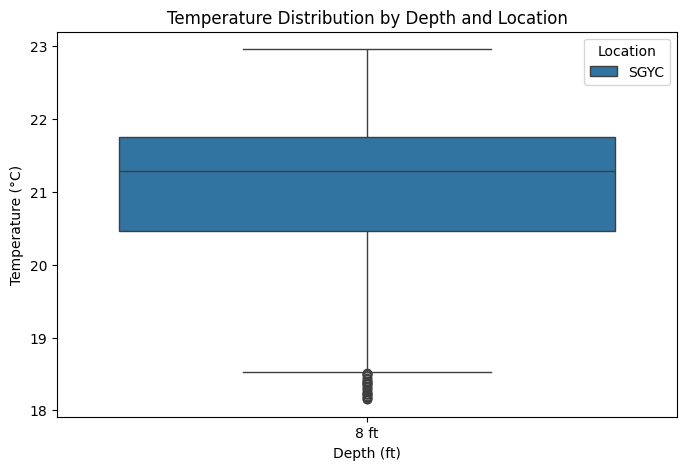

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x='Depth (ft)', y='Average temperature (celsius)', hue='Location', data=averages)
plt.title("Temperature Distribution by Depth and Location")
plt.xlabel("Depth (ft)")
plt.ylabel("Temperature (°C)")
plt.legend(title="Location")
plt.show()
